In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
data =pd.read_csv(r'C:\Users\HP\Desktop\datasets%2F596958%2F1073629%2FPlacement_Data_Full_Class.csv')
data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [4]:
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [6]:
y= data['mba_p']
x1=data[['ssc_p','hsc_p']]

In [7]:
x= sm.add_constant(x1)
results= sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  mba_p   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     23.89
Date:                Fri, 19 Jun 2020   Prob (F-statistic):           4.40e-10
Time:                        14:38:08   Log-Likelihood:                -661.89
No. Observations:                 215   AIC:                             1330.
Df Residuals:                     212   BIC:                             1340.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.6052      2.587     17.243      0.000      39.506      49.704
ssc_p          0.1510      0.039      3.883      0.000       0.074       0.228
hsc_p          0.1132      0.039      2.928      0.004       0.037       0.189
==============================================================================
Omnibus:                        3.143   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.208   Jarque-Bera (JB):                2.890
Skew:                           0.209   Prob(JB):                        0.236
Kurtosis:                       2.616   Cond. No.                         684.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

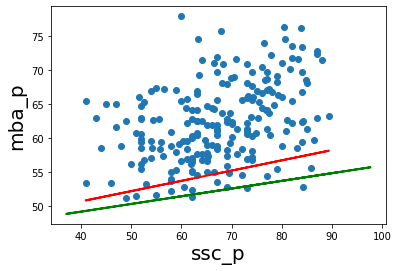

In [12]:
plt.scatter(data['ssc_p'],y)
yhat_ssc_p=44.6052+0.1510*data['ssc_p']
yhat_hsc_p=44.6052+0.1132*data['hsc_p']
fig = plt.plot(data['ssc_p'],yhat_ssc_p,lw=2,c='red')
fig = plt.plot(data['hsc_p'],yhat_hsc_p,lw=2,c='green')
plt.xlabel('ssc_p',fontsize=20)
plt.ylabel('mba_p',fontsize=20)
plt.show()